<a href="https://colab.research.google.com/github/AqsaAkmal/assignment/blob/main/assignment1ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving archive .zip to archive .zip


In [6]:
import os
print(os.listdir("/content"))

['.config', 'archive .zip', 'sample_data']


In [8]:
import zipfile

# Define paths
zip_path = "/content/archive .zip"  # Your uploaded file
extract_folder = "/content/dataset"  # Folder where we'll extract

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Confirm extraction
print("Extraction complete!")
print(os.listdir(extract_folder))  # List extracted files


Extraction complete!
['Churn_Modelling.csv']


In [9]:
print(os.listdir("/content/dataset"))


['Churn_Modelling.csv']


In [10]:
import pandas as pd

# Use the correct file name from the extraction step
csv_path = "/content/dataset/Churn_Modelling.csv"  # Adjust the name as needed

# Load the dataset
df = pd.read_csv(csv_path)

# Display the first few rows
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7738 - loss: 0.5129 - val_accuracy: 0.8344 - val_loss: 0.4037
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8353 - loss: 0.3952 - val_accuracy: 0.8469 - val_loss: 0.3741
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - loss: 0.3708 - val_accuracy: 0.8537 - val_loss: 0.3657
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3553 - val_accuracy: 0.8506 - val_loss: 0.3542
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - loss: 0.3344 - val_accuracy: 0.8519 - val_loss: 0.3555
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8539 - loss: 0.3505 - val_accuracy: 0.8537 - val_loss: 0.3550
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8529 - loss: 0.3524 - val_accuracy: 0.8544 - val_loss: 0.3500
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.3267 - val_accuracy: 0.

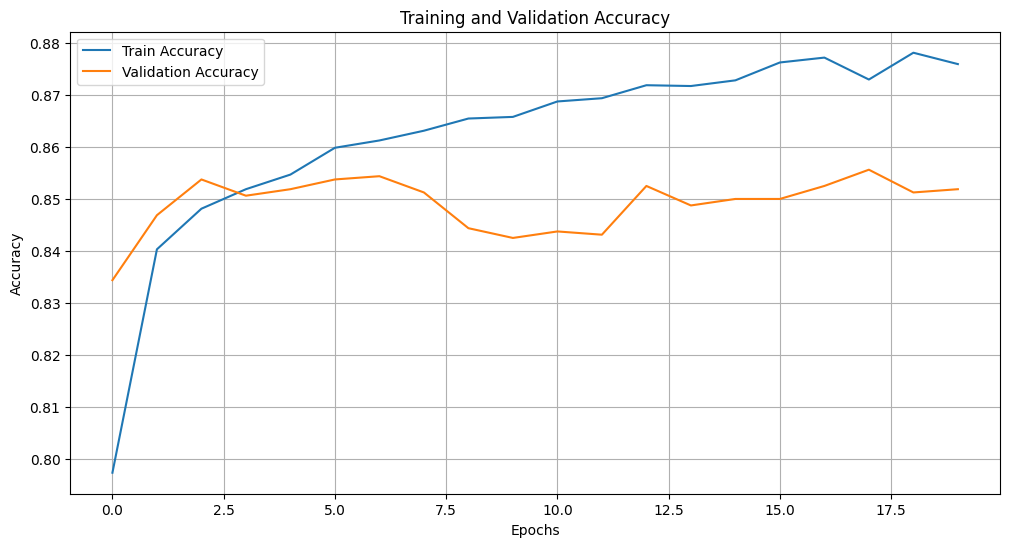

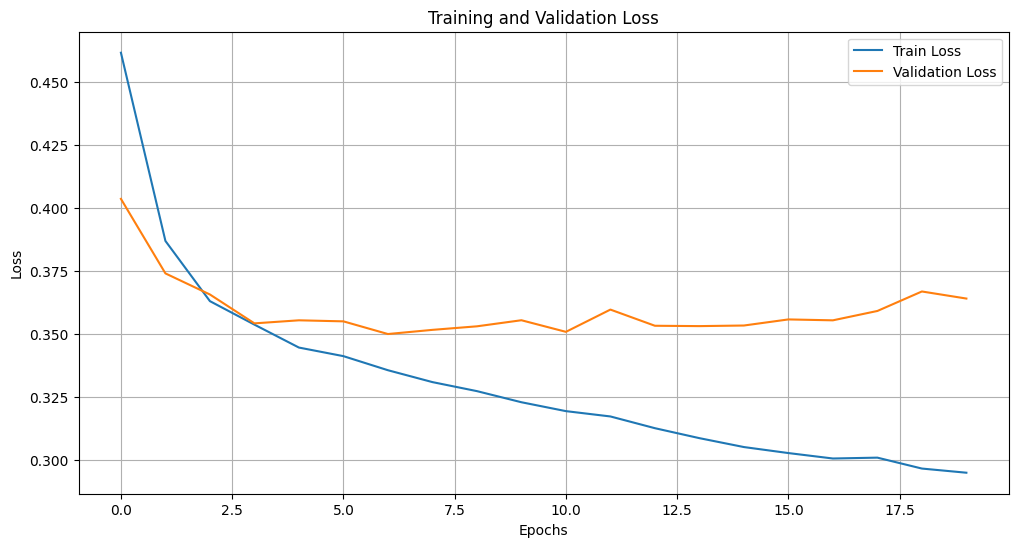

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions: [[False]
 [False]
 [False]
 [False]
 [False]]


In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset (use the correct path after uploading the dataset)
df = pd.read_csv("/content/dataset/Churn_Modelling.csv")

# Display the first few rows of the dataset
print(df.head())

# Step 1: Drop the 'Surname' column as it's not useful for prediction
df.drop(columns=['Surname'], inplace=True)

# Step 2: Encode Categorical Features ('Geography' and 'Gender')
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=['Exited'])  # Features (drop 'Exited' column)
y = df['Exited']  # Target (the 'Exited' column is the churn label)

# Step 4: Feature Scaling (normalize numerical data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete!")

# Step 6: Define the Artificial Neural Network (ANN) model
model = tf.keras.Sequential()

# Input layer and first hidden layer
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Third hidden layer (optional)
model.add(tf.keras.layers.Dense(units=16, activation='relu'))

# Output layer (binary classification: 1 = churn, 0 = stay)
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

print("Model Training Complete!")

# Step 9: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 10: Plot Training & Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 12: Making Predictions on the Test Set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary values (0 or 1)

# Display the first 5 predictions
print("Predictions:", y_pred[:5])
